In [1]:
%reset -f
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.image as mpimg

In [3]:
pd.options.display.float_format = "{:.4f}".format

In [4]:
mat = sio.loadmat("data/ex7data1.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
x = mat["X"]

In [6]:
model = sbbml.KMeans(k = 3, iterations = 10)
model.fit(x)

In [7]:
model.centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

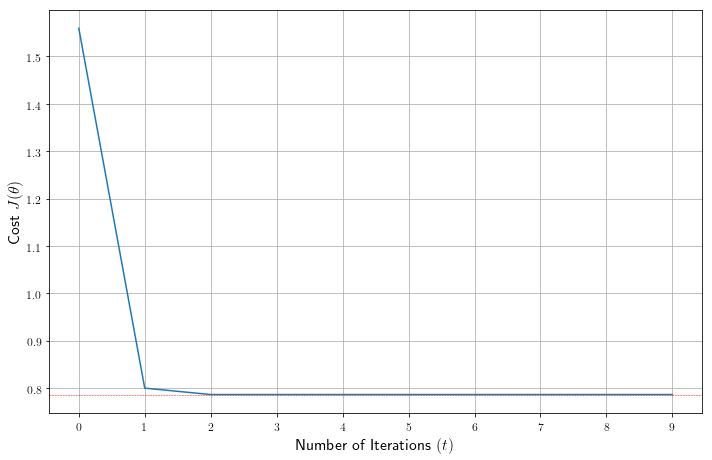

In [8]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

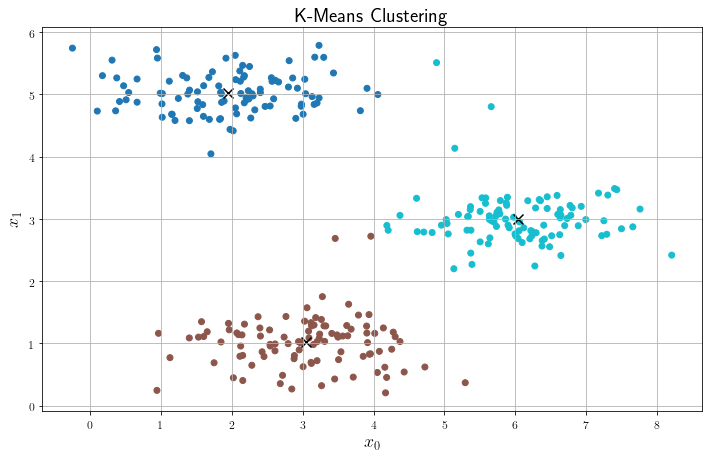

In [9]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(x = x[:,0], y = x[:,1], c = model.classes, cmap = "tab10")
ax.scatter(model.centroids[:,0], model.centroids[:,1], c = "k", marker = "x", s = 100)
ax.set_title("K-Means Clustering", fontsize = 20)
ax.set_xlabel("$x_0$", fontsize = 18)
ax.set_ylabel("$x_1$", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

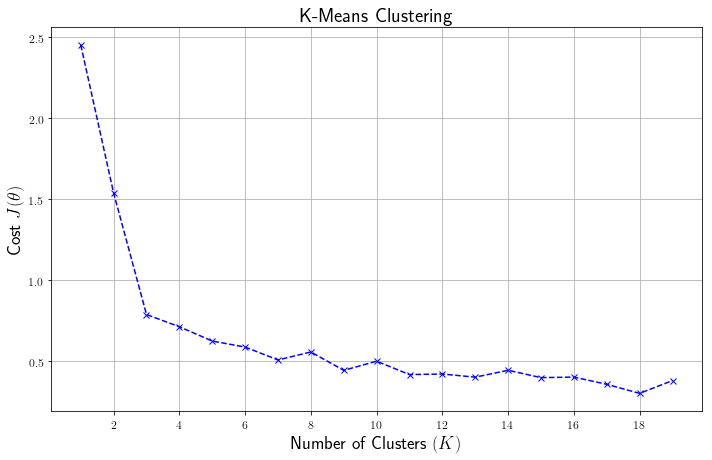

In [10]:
k     = 20
costs = np.zeros(k)

for i in range(k):
    if i == 0:
        costs[i] = np.inf
    else:
        model = sbbml.KMeans(k = i, iterations = 100)
        model.fit(x)
        costs[i] = min(model.cost)

fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.plot(costs, c = "b", ls = "--", marker = "x")
ax.set_title("K-Means Clustering", fontsize = 20)
ax.set_xlabel("Number of Clusters $(K)$", fontsize = 18)
ax.set_ylabel("Cost $J(\\theta)$", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [11]:
model = sbbml.KMedians(k = 3, iterations = 10)
model.fit(x)

In [12]:
model.centroids

array([[6.00762256, 2.96677646],
       [2.05131556, 5.00762682],
       [3.12147646, 1.03019276]])

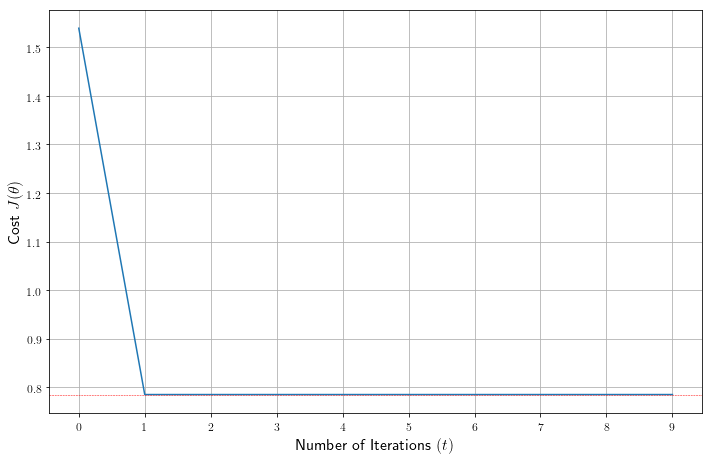

In [13]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

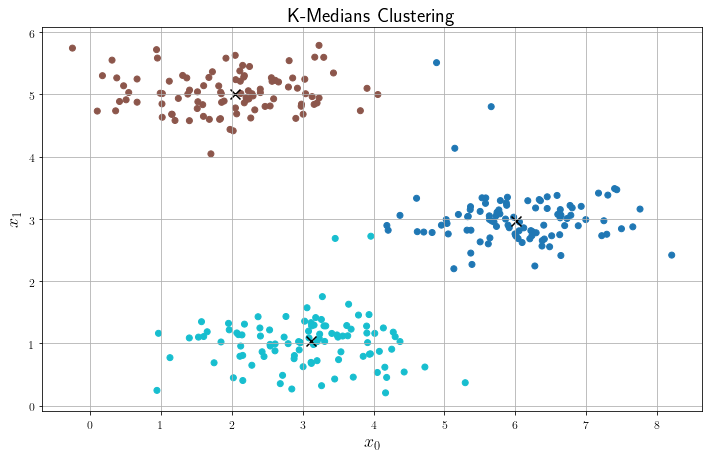

In [14]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(x = x[:,0], y = x[:,1], c = model.classes, cmap = "tab10")
ax.scatter(model.centroids[:,0], model.centroids[:,1], c = "k", marker = "x", s = 100)
ax.set_title("K-Medians Clustering", fontsize = 20)
ax.set_xlabel("$x_0$", fontsize = 18)
ax.set_ylabel("$x_1$", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

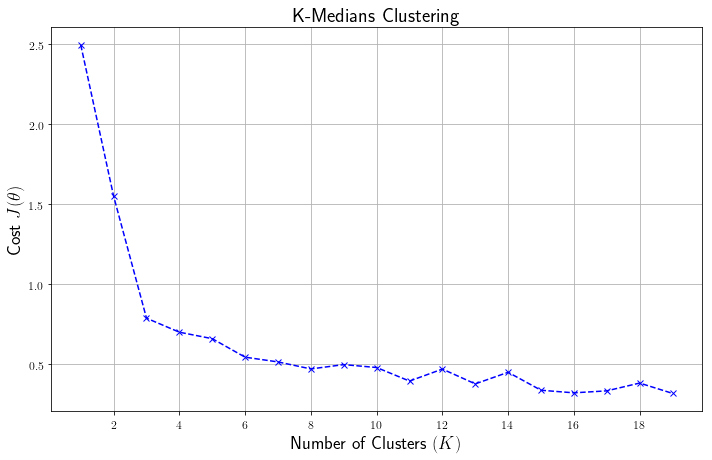

In [15]:
k     = 20
costs = np.zeros(k)

for i in range(k):
    if i == 0:
        costs[i] = np.inf
    else:
        model = sbbml.KMedians(k = i, iterations = 100)
        model.fit(x)
        costs[i] = min(model.cost)

fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.plot(costs, c = "b", ls = "--", marker = "x")
ax.set_title("K-Medians Clustering", fontsize = 20)
ax.set_xlabel("Number of Clusters $(K)$", fontsize = 18)
ax.set_ylabel("Cost $J(\\theta)$", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [16]:
img = mpimg.imread("data/bird-small.png")

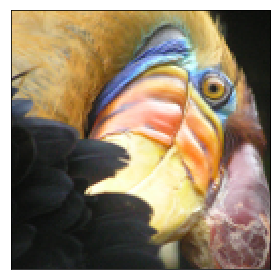

In [17]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

In [18]:
m = img.shape[0]
n = img.shape[1]

x = img.reshape(m * n, 3)

In [19]:
model = sbbml.KMeans(k = 16, iterations = 1000)
model.fit(x)

In [20]:
model.centroids

array([[0.3654358 , 0.34496182, 0.3637219 ],
       [0.96344733, 0.85931015, 0.6330179 ],
       [0.9197741 , 0.58099693, 0.26301107],
       [0.7545628 , 0.60565716, 0.34388298],
       [0.26381576, 0.23414032, 0.22248971],
       [0.39875582, 0.47195795, 0.66757023],
       [0.08161405, 0.08841589, 0.07808196],
       [0.86513656, 0.7177456 , 0.46023792],
       [0.6590998 , 0.4743032 , 0.2043658 ],
       [0.14898555, 0.1541533 , 0.14606646],
       [0.6771824 , 0.6076845 , 0.5490065 ],
       [0.820202  , 0.73731625, 0.72639555],
       [0.4688804 , 0.34391236, 0.20645338],
       [0.9755767 , 0.9447895 , 0.81820667],
       [0.5737916 , 0.72686315, 0.87089604],
       [0.5605672 , 0.46806064, 0.41310185]], dtype=float32)

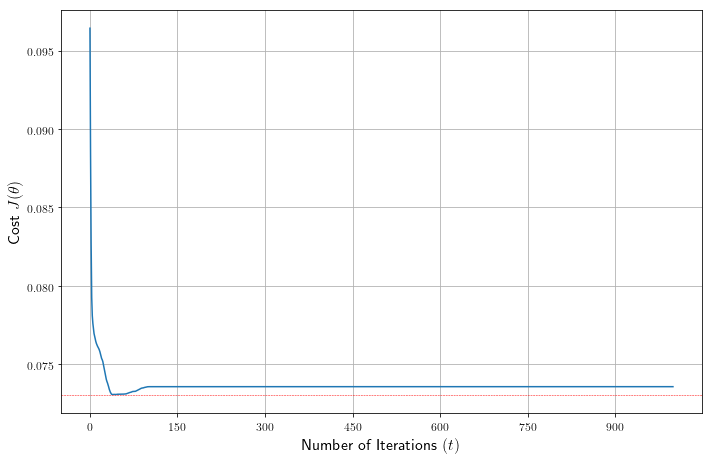

In [21]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

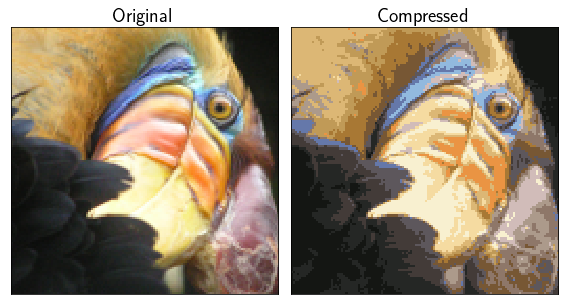

In [22]:
compressed = np.array([model.centroids[i] for i in model.classes])
compressed = np.reshape(compressed, (128, 128, 3))

fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, sharey = True, figsize = (8, 8))

axes[0].imshow(img)
axes[1].imshow(compressed)
axes[0].set_title("Original", fontsize = 20)
axes[1].set_title("Compressed", fontsize = 20)

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.05, hspace = 0.1)

plt.show()